In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
dataNorm = pd.read_csv("data/Hospitales_Normalizados.csv",index_col=0)

In [15]:
dataNorm.head(3)

,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,ENF. CRONICA PULMONAR OBSTRUCTIVA,FIEBRE,ITU,HOSPITALIZACION
EDAD,,,,,,,,,
53.0,0,0,4.0,1,12.0,0,1,0,1
56.0,0,0,7.7,1,12.0,0,1,0,1
57.0,0,0,29.0,1,24.0,0,1,0,1


Definimos nuestras variables predictoras **x _(features)_** y la etiqueta a predecir **y _(target)_**

In [25]:
x = dataNorm.drop(columns="HOSPITALIZACION")
y = dataNorm["HOSPITALIZACION"]

Ahora que ya definimos las variables, vamos a separar nuestros datos en entrenamiento y testeo. Utilizaremos el 20% del dataset para evaluar.

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

#Instanciamos el modelo
clf = KNeighborsClassifier(n_neighbors=5)

#Entrenamos el modelo
clf.fit(x_train, y_train)

#Predecimos sobre nuestro set de entrenamieto

y_train_pred = clf.predict(x_train)

#Predecimos sobre nuestro set de testeo

y_test_pred = clf.predict(x_test)

### **`Matriz de confusión`**



#### Veamos la matriz de nuestro modelo

In [31]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_train, y_train_pred)
matrix_2 = confusion_matrix(y_test, y_test_pred)

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(matrix)
cm_display_2 = ConfusionMatrixDisplay(matrix_2)

#para obtener el valor de precisión, recall, F1-score y soporte para cada clase en un problema de clasificación
from sklearn.metrics import classification_report

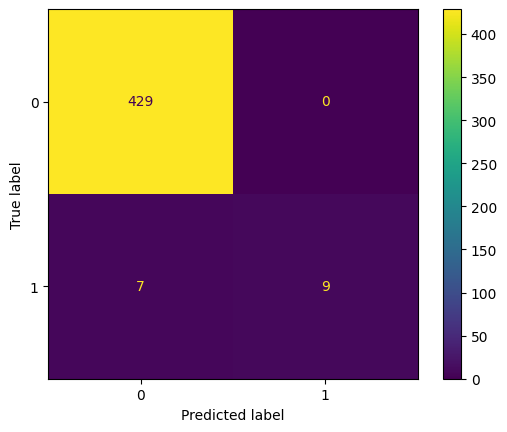

-----------------------------------------------------------------------
                    precision    recall  f1-score   support

           0       0.98      1.00      0.99       429
           1       1.00      0.56      0.72        16

    accuracy                           0.98       445
   macro avg       0.99      0.78      0.86       445
weighted avg       0.98      0.98      0.98       445



In [42]:
cm_display.plot()
plt.show()
print(f'''-----------------------------------------------------------------------
      {classification_report(y_train, y_train_pred)}''')

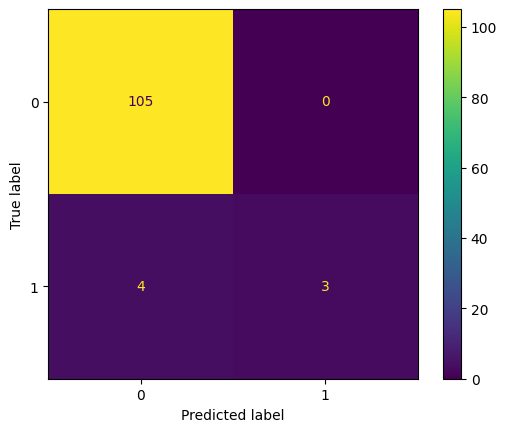

-----------------------------------------------------------------------
                    precision    recall  f1-score   support

           0       0.96      1.00      0.98       105
           1       1.00      0.43      0.60         7

    accuracy                           0.96       112
   macro avg       0.98      0.71      0.79       112
weighted avg       0.97      0.96      0.96       112



In [44]:
cm_display_2.plot()
plt.show()
print(f'''-----------------------------------------------------------------------
      {classification_report(y_test, y_test_pred)}''')

In [37]:
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_test_pred)
print(exactitud)

0.9642857142857143


In [52]:
from sklearn.preprocessing import label_binarize

# Binarizamos y_test

y_test2 = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test2.shape[1]
print(y_test2[:5])


[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [53]:
y_score = clf.predict_proba(x_test)
print(y_score[:5])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [54]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes-1):
    fpr[i], tpr[i], _ = roc_curve(y_test2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

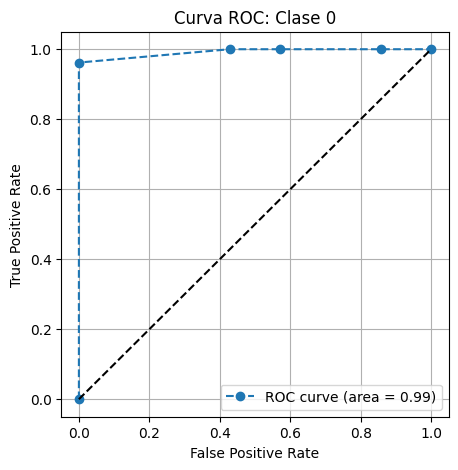

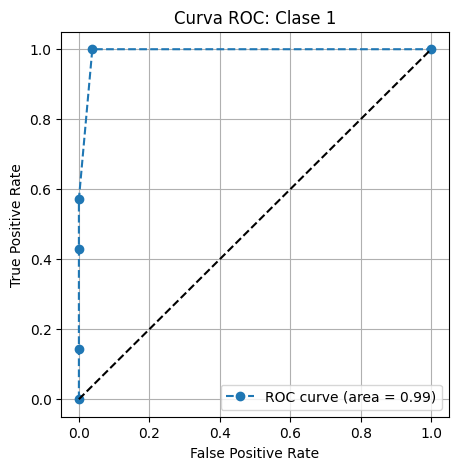

In [55]:
# Recorremos con un bucle cada una de las clases
for i in range(n_classes-1):
    plt.figure(figsize=(5,5))
    plt.plot(fpr[i], tpr[i],'o--', label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC: Clase ' + str(i))
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

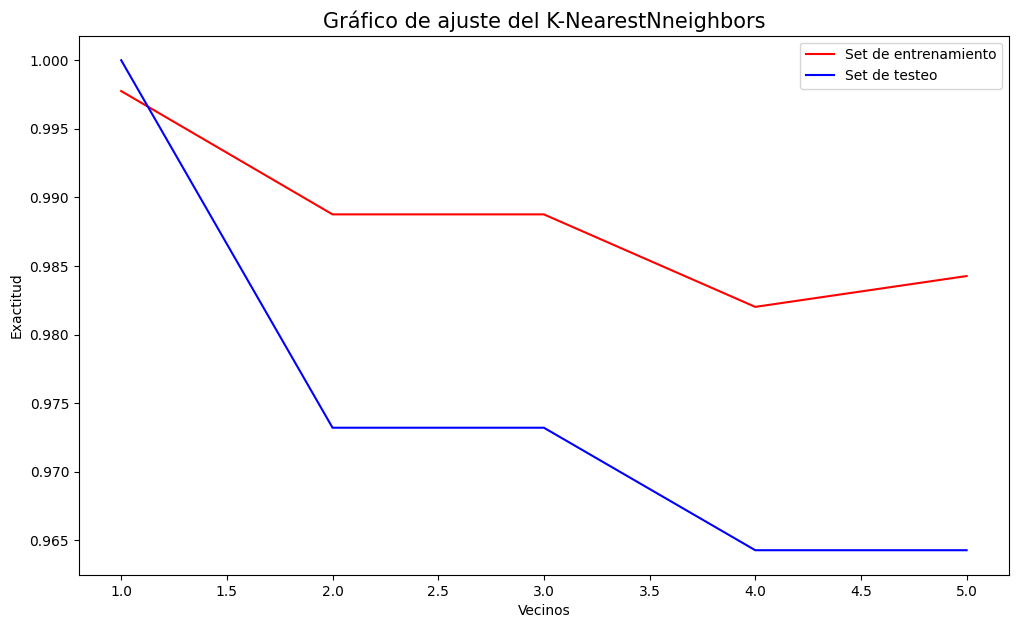

In [60]:
train_prec =  []
test_prec = []
max_KNN_list = list(range(1, 6))

for k in max_KNN_list:
    clf_3 = KNeighborsClassifier(n_neighbors=k)
    clf_3.fit(x_train, y_train)
    train_prec.append(clf_3.score(x_train, y_train))
    test_prec.append(clf_3.score(x_test, y_test))

plt.figure(figsize=(12,7))
plt.plot(max_KNN_list, train_prec, color='r', label='Set de entrenamiento')
plt.plot(max_KNN_list, test_prec, color='b', label='Set de testeo')
plt.title('Gráfico de ajuste del K-NearestNneighbors', fontsize = 15)
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('Vecinos')
plt.show()